# Matt Sloane / ms9548

## Homework 12, Assignment 1 (Extra Credit)

In [2]:
# Import Modules / Setup Notebook Environment (CODE PROVIDED BY PROFESSOR)

# note this is python2 compatible only. the pykriging code is also python2 only
import os
import numpy as np
import ast
import urllib2
import urllib
from cStringIO import StringIO
import json
import geopandas as gpd
import pandas as pd
import shapely
import pylab as pl
%pylab inline

pui_Data = os.getenv("PUIDATA")

SQL_SOURCE = 'https://fb55.carto.com/api/v2/sql'

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    """ queries a url with an sql compatible search
    Arguments:
    query : the sql query string
    format : the expected format
    source " the url of the API
    """
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return StringIO(response.read())

Populating the interactive namespace from numpy and matplotlib


In [3]:
# fill in the query details in facilityQuery: 
# within a single query collect AND GROUP the data by zipcode
facilityQuery = '''SELECT COUNT (cartodb_id), zipcodes 
FROM nycasthmasdismissals
GROUP BY zipcodes
'''
facilityStream = queryCartoDB(facilityQuery, format='JSON')
facilityData   = json.loads(facilityStream.read())
facilities     = pd.DataFrame(facilityData['rows'])
facilities.columns = ['Count', 'ZIPCODE']
facilities['ZIPCODE'] = facilities['ZIPCODE'].apply(pd.to_numeric)
facilities

,Count,ZIPCODE
0,1699,10461
1,405,11373
2,1698,10451
3,220,11691
4,246,11375
5,494,10466
6,713,11212
7,167,11229
8,521,11215
9,386,11220


In [4]:
# Load in NYC Zipcodes Shapefile Data, obtained from:
# https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u
shape_path = pui_Data + "/HW12_Data/ZIP_CODE_040114.shp"
zc_shape = gpd.GeoDataFrame.from_file(shape_path)
zc_reduct = zc_shape[["ZIPCODE", "geometry"]]
zc_reduct['ZIPCODE'] = zc_reduct['ZIPCODE'].apply(pd.to_numeric)
zc_reduct

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [5]:
# Convert geometry field to zip code centroid data
zc_reduct['geometry'] = gpd.GeoSeries(zc_reduct.centroid)
zc_reduct

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ZIPCODE,geometry
0,11436,POINT (1040696.262135346 185580.2219140405)
1,11213,POINT (1001912.871996466 183803.1131420481)
2,11212,POINT (1008365.375095716 180768.9448568909)
3,11225,POINT (997023.1926918941 180870.3533200975)
4,11218,POINT (990785.2911208535 173656.048379133)
5,11226,POINT (996162.6751228294 174807.9970578609)
6,11219,POINT (985172.779324743 169813.4852984693)
7,11210,POINT (999084.3959355468 167909.6080879942)
8,11230,POINT (993775.081486132 165916.1064955659)
9,11204,POINT (988452.3985091124 164795.0331785564)


In [6]:
# Merge Zipcode and Count Data
zc_merge = zc_reduct.merge(facilities, on = 'ZIPCODE')
zc_merge

,ZIPCODE,geometry,Count
0,11213,POINT (1001912.871996466 183803.1131420481),376
1,11212,POINT (1008365.375095716 180768.9448568909),713
2,11219,POINT (985172.779324743 169813.4852984693),421
3,10466,POINT (1026647.114925691 263909.2896452093),494
4,10467,POINT (1020059.119296007 259287.5178783316),2164
5,10461,POINT (1028292.72437689 247902.4282787614),1699
6,10457,POINT (1012373.99669069 247427.2407033304),822
7,10456,POINT (1009764.343531543 241746.6814908273),1072
8,10451,POINT (1005358.961284301 238316.0675161843),1698
9,11102,POINT (1004612.515718838 220393.7206859779),281


In [7]:
# Create 3 dimensional array, length equal to merged zipcode data (29 records)
krigdata = np.zeros((len(zc_merge),3))
krigdata

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [8]:
# Write merge data into array

for x in range(len(krigdata)):
    krigdata[x][0] = zc_merge.Count[x]
    krigdata[x][1] = zc_merge.geometry[x].x
    krigdata[x][2] = zc_merge.geometry[x].y

krigdata

array([[  3.76000000e+02,   1.00191287e+06,   1.83803113e+05],
       [  7.13000000e+02,   1.00836538e+06,   1.80768945e+05],
       [  4.21000000e+02,   9.85172779e+05,   1.69813485e+05],
       [  4.94000000e+02,   1.02664711e+06,   2.63909290e+05],
       [  2.16400000e+03,   1.02005912e+06,   2.59287518e+05],
       [  1.69900000e+03,   1.02829272e+06,   2.47902428e+05],
       [  8.22000000e+02,   1.01237400e+06,   2.47427241e+05],
       [  1.07200000e+03,   1.00976434e+06,   2.41746681e+05],
       [  1.69800000e+03,   1.00535896e+06,   2.38316068e+05],
       [  2.81000000e+02,   1.00461252e+06,   2.20393721e+05],
       [  6.41000000e+02,   1.03375196e+06,   2.13025445e+05],
       [  1.15600000e+03,   1.00620449e+06,   1.95763534e+05],
       [  4.66000000e+02,   1.00021475e+06,   1.95030042e+05],
       [  9.40000000e+02,   9.87194513e+05,   1.92431928e+05],
       [  5.21000000e+02,   9.89857162e+05,   1.81769963e+05],
       [  1.82900000e+03,   1.00248639e+06,   1.7596792

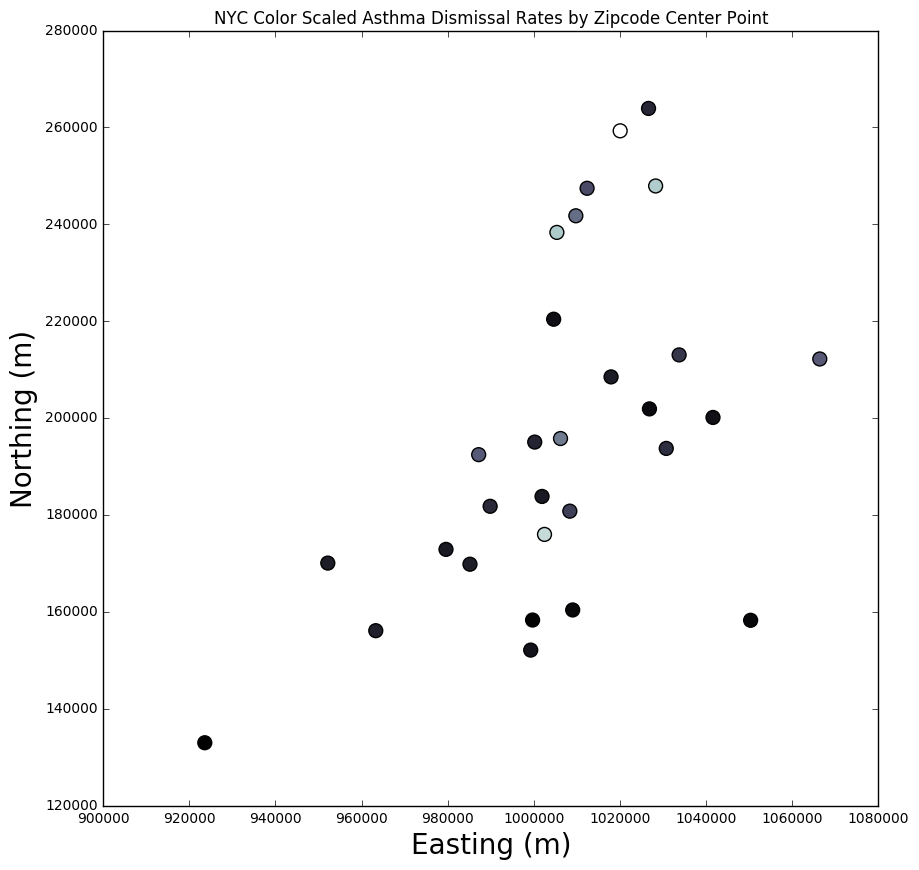

In [10]:
# Plot Array
pl.figure(figsize=(10,10))
pl.scatter(krigdata[:,1], krigdata[:,2], c=krigdata[:,0], s=100, cmap='bone')
pl.xlabel("Easting (m)", fontsize=20)
pl.ylabel("Northing (m)", fontsize=20)
pl.title("NYC Color Scaled Asthma Dismissal Rates by Zipcode Center Point")


#### The above plot illustrates zip code center points in New York City (by Easting and Northing on the x and y axes, respectively), with the center points shaded light to dark, with lighter points representing smaller numbers asthma dismissal cases and darker points representing zip codes with higher numbers of asthma dismissal cases.